In [1]:
import mglearn

d:\myfiles\bstu\3rd\2nd\ai\sklearn\labs\venv\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
d:\myfiles\bstu\3rd\2nd\ai\sklearn\labs\venv\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


w[0]: 0.393906  b: -0.031804


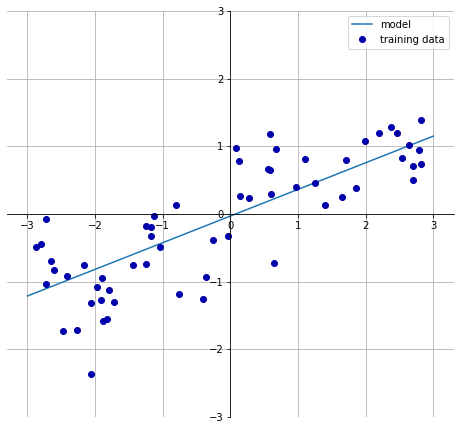

In [3]:
mglearn.plots.plot_linear_regression_wave()

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
x, y = mglearn.datasets.make_wave(n_samples=60)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)

print(f'Тренировочный набор: {lr.score(x_train, y_train)}')
print(f'Тестовый набор: {lr.score(x_test, y_test)}')

Тренировочный набор: 0.6700890315075756
Тестовый набор: 0.65933685968637


In [45]:
x, y = mglearn.datasets.load_extended_boston()

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
lr = LinearRegression()
lr.fit(x_train, y_train)

print(f'Тренировочный: {lr.score(x_train, y_train)}')
print(f'Тестовый: {lr.score(x_test, y_test)}')

Тренировочный: 0.9520519609032729
Тестовый: 0.607472195966596


In [47]:
from sklearn.linear_model import Ridge

In [50]:
ridge = Ridge()
ridge.fit(x_train, y_train)

print(f'Тренировочный: {ridge.score(x_train, y_train)}')
print(f'Тестовый: {ridge.score(x_test, y_test)}')

Тренировочный: 0.885796658517094
Тестовый: 0.7527683481744755


In [55]:
ridge10 = Ridge(alpha=10)
ridge10.fit(x_train, y_train)
print("Правильностьнаобучающемнаборе: {:.2f}".format(ridge10.score(x_train, y_train)))
print("Правильностьнатестовомнаборе: {:.2f}".format(ridge10.score(x_test, y_test)))

Правильностьнаобучающемнаборе: 0.79
Правильностьнатестовомнаборе: 0.64


In [57]:
ridge01 = Ridge(alpha=0.1).fit(x_train, y_train)

print("Правильностьнаобучающемнаборе: {:.2f}".format(ridge01.score(x_train, y_train)))
print("Правильностьнатестовомнаборе: {:.2f}".format(ridge01.score(x_test, y_test)))

Правильностьнаобучающемнаборе: 0.93
Правильностьнатестовомнаборе: 0.77


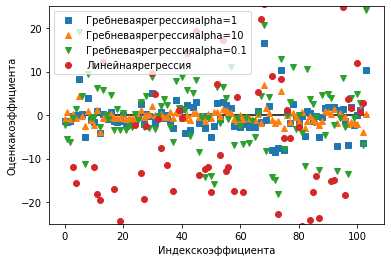

In [60]:
plt.plot(ridge.coef_, 's', label="Гребневаярегрессияalpha=1")
plt.plot(ridge10.coef_, '^', label="Гребневаярегрессияalpha=10")
plt.plot(ridge01.coef_, 'v', label="Гребневаярегрессияalpha=0.1")
plt.plot(lr.coef_, 'o', label="Линейнаярегрессия")
plt.xlabel("Индекскоэффициента")
plt.ylabel("Оценкакоэффициента")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

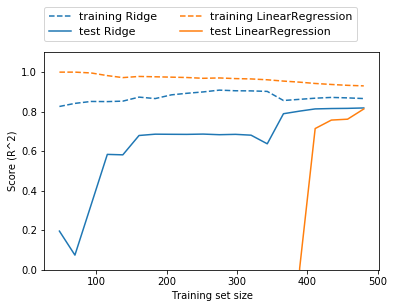

In [62]:
mglearn.plots.plot_ridge_n_samples()

In [64]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(x_train, y_train)

print("Правильностьнаобучающемнаборе: {:.2f}".format(lasso.score(x_train, y_train)))
print("Правильностьнатестовомнаборе: {:.2f}".format(lasso.score(x_test, y_test)))

Правильностьнаобучающемнаборе: 0.29
Правильностьнатестовомнаборе: 0.21


In [70]:
lasso001 = Lasso(alpha=0.01, max_iter=10000)
lasso001.fit(x_train, y_train)

print("Правильностьнаобучающемнаборе: {:.2f}".format(lasso001.score(x_train, y_train)))
print("Правильностьнатестовомнаборе: {:.2f}".format(lasso001.score(x_test, y_test)))

Правильностьнаобучающемнаборе: 0.90
Правильностьнатестовомнаборе: 0.77


In [76]:
import numpy as np
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(x_train, y_train)
print("Правильностьнаобучающемнаборе: {:.2f}".format(lasso00001.score(x_train, y_train)))
print("Правильностьнатестовомнаборе: {:.2f}".format(lasso00001.score(x_test, y_test)))
print("Количествоиспользованных признаков: {}".format(np.sum(lasso00001.coef_ != 0)))

Правильностьнаобучающемнаборе: 0.95
Правильностьнатестовомнаборе: 0.64
Количествоиспользованных признаков: 96


Text(0, 0.5, 'Оценкакоэффициента')

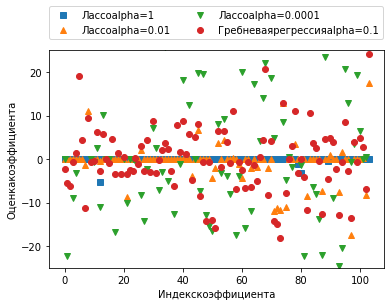

In [77]:
plt.plot(lasso.coef_, 's', label="Лассоalpha=1")
plt.plot(lasso001.coef_, '^', label="Лассоalpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Лассоalpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Гребневаярегрессияalpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Индекскоэффициента")
plt.ylabel("Оценкакоэффициента")